In [1]:
#import the libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

-----------------START THE DATA CLEANING------------------

In [2]:
#we read the csv
accidentes = pd.read_csv("accidents.csv")

In [3]:
#check the content of the columns
accidentes.head(5)

,Title,Date,Description,Province,City,Industry,Sub Industry,Company Name,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,"A building caught fire in Dalian, Liaoning",Liaoning,Dalian,Construction,NaN,NaN,Unknown,Fire,0,0,0,0
1,A construction site caught fire in Beijing,2021-08-26,A construction site caught fire in Beijing,Beijing,NaN,Construction,NaN,NaN,Unknown,Fire,0,0,0,0
2,Four injured after collapse at a highway site ...,2021-08-23,Four injured after collapse at a highway site ...,Yunnan,Honghe,Construction,NaN,NaN,Unknown,Falling/Structural failure,0,1-9,0,0
3,"One dead in accident at a coal mine in Baotou,...",2021-08-21,"One dead in accident at a coal mine in Baotou,...",Neimenggu,Baotou,Coal mining,NaN,NaN,Private Enterprise,Structural failure,1-9,0,0,0
4,A factory of Taiyuan Steel caught fire after t...,2021-08-21,A factory of Taiyuan Steel caught fire after t...,Shanxi,Taiyuan,Industrial(iron and steel),NaN,NaN,SOE,Fire,0,0,0,0


In [4]:
#we verify the information in each of the columns
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               279 non-null    object 
 1   Date                279 non-null    object 
 2   Description         279 non-null    object 
 3   Province            279 non-null    object 
 4   City                276 non-null    object 
 5   Industry            279 non-null    object 
 6   Sub Industry        1 non-null      object 
 7   Company Name        0 non-null      float64
 8   Company Ownership   278 non-null    object 
 9   Type                276 non-null    object 
 10  Number of Deaths    279 non-null    object 
 11  Number of Injuries  279 non-null    object 
 12  Number of Punished  279 non-null    int64  
 13  Financial Penalty   279 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 30.6+ KB


In [5]:
#request csv description
accidentes.describe()

,Company Name,Number of Punished,Financial Penalty
count,0.0,279.0,279.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


In [6]:
accidentes.head(1)

,Title,Date,Description,Province,City,Industry,Sub Industry,Company Name,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,"A building caught fire in Dalian, Liaoning",Liaoning,Dalian,Construction,NaN,NaN,Unknown,Fire,0,0,0,0


In [7]:
#delete the company name column
accidentes = accidentes.drop("Company Name", axis= 1)

In [8]:
accidentes.head(1)

,Title,Date,Description,Province,City,Industry,Sub Industry,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,"A building caught fire in Dalian, Liaoning",Liaoning,Dalian,Construction,NaN,Unknown,Fire,0,0,0,0


In [9]:
#we remove the sub industry column
accidentes = accidentes.drop("Sub Industry", axis= 1)

In [10]:
accidentes.head(1)

,Title,Date,Description,Province,City,Industry,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,"A building caught fire in Dalian, Liaoning",Liaoning,Dalian,Construction,Unknown,Fire,0,0,0,0


In [11]:
#we remove the description column as the title contains the same information
accidentes = accidentes.drop("Description", axis= 1)

In [12]:
#we remove null data from rows and columns
accidentes.dropna(inplace=True)

In [13]:
#Removes duplicate columns and rows
accidentes.drop_duplicates(inplace=True)

In [14]:
#Shows the null values
print(accidentes.isnull().sum())

Title                 0
Date                  0
Province              0
City                  0
Industry              0
Company Ownership     0
Type                  0
Number of Deaths      0
Number of Injuries    0
Number of Punished    0
Financial Penalty     0
dtype: int64


In [15]:
accidentes.head(1)

,Title,Date,Province,City,Industry,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,Liaoning,Dalian,Construction,Unknown,Fire,0,0,0,0


In [16]:
#we eliminated the Number of Punished and Financial Penalty columns as they do not add any value.
accidentes = accidentes.drop("Number of Punished", axis= 1)
accidentes = accidentes.drop("Financial Penalty", axis= 1)

In [17]:
accidentes.head(1)

,Title,Date,Province,City,Industry,Company Ownership,Type,Number of Deaths,Number of Injuries
0,"A building caught fire in Dalian, Liaoning",2021-08-27,Liaoning,Dalian,Construction,Unknown,Fire,0,0


----------WE START PLOTTING THE DATA------------

In [18]:
#top 5 cities with the most accidents
value_counts_ciudades_mas = accidentes['City'].value_counts()

print(value_counts_ciudades_mas.head(5))

City
Tianjing    20
Beijing     12
Shenzhen     8
Hangzhou     7
Lvliang      6
Name: count, dtype: int64


<Axes: xlabel='City'>

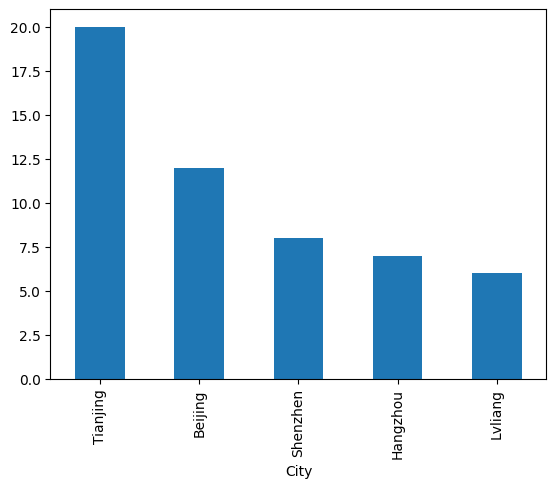

In [19]:
#cities with more accidents at work
accidentes['City'].value_counts().head(5).plot.bar()

In [20]:
#top 5 cities with the fewest accidents
value_counts_ciudades_menos = accidentes['City'].value_counts()

print(value_counts_ciudades_menos.tail(5))

City
xiangyangshi    1
Jinan           1
苏州市             1
Qingdao         1
Liaoyuan        1
Name: count, dtype: int64


<Axes: xlabel='City'>

C:\Users\Brai\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 33487 (\N{CJK UNIFIED IDEOGRAPH-82CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\Brai\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Brai\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
C:\Users\Brai\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33487 (\N{CJK UNIFIED IDEOGRAPH-82CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Brai\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  fig.canva

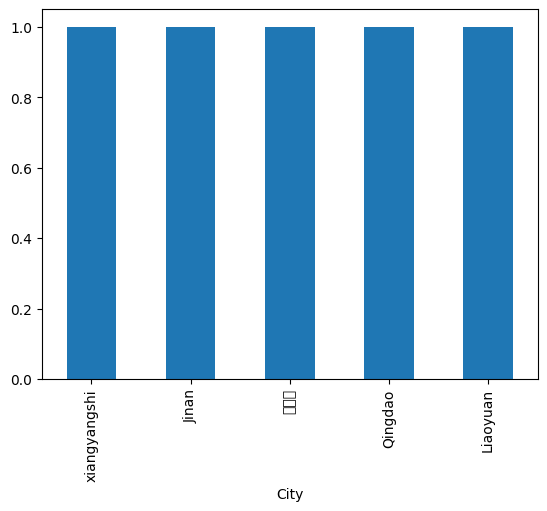

In [21]:
#Graph of the cities with the fewest accidents at work
accidentes['City'].value_counts().tail(5).plot.bar()

Many of the reasons why these cities have fewer accidents could be:
* They have a better education, therefore their citizens give much more importance to the risks involved in performing certain types of work.
* The industries are interested in educating their workers about occupational hazards.
* The jobs that predominate in these cities are different from the rest of the cities, so the percentage of accidents decreases drastically.

In [22]:
#we are looking for the industry with the most accidents
value_counts_industria_mas = accidentes['Industry'].value_counts()

print(value_counts_industria_mas.head(5))

Industry
Construction                  97
Coal mining                   32
Industrial(iron and steel)    32
Storage/Logistics             32
Other                         27
Name: count, dtype: int64


<Axes: xlabel='Industry'>

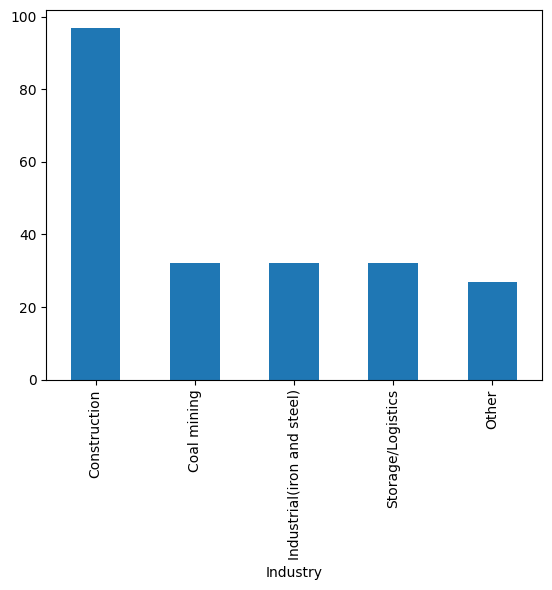

In [23]:
#Bar chart of the industries with the most accidents
accidentes['Industry'].value_counts().head(5).plot.bar()

In [24]:
#the industry with the fewest accidents
value_counts_industria_menos = accidentes['Industry'].value_counts()

print(value_counts_industria_menos.tail(5))

Industry
Storage/Logistics        32
Other                    27
Repair/maintenance       27
Manufacturing            23
Other mining industry     1
Name: count, dtype: int64


<Axes: xlabel='Industry'>

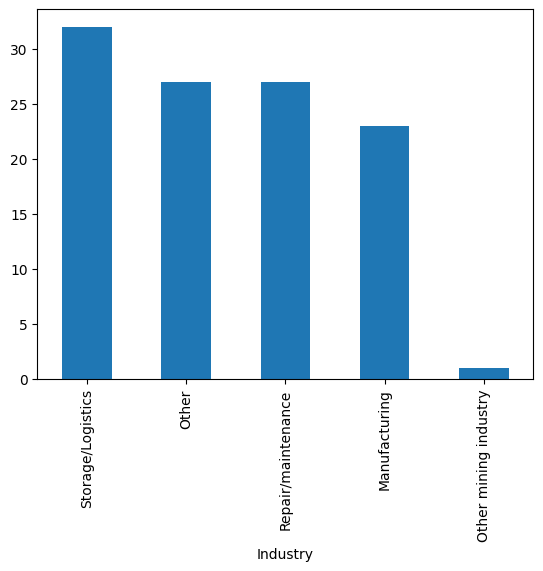

In [25]:
#Bar chart of industries with the fewest accidents
accidentes['Industry'].value_counts().tail(5).plot.bar()

We can determine that those industries with fewer accidents, is because they invest in reducing them, they seek to educate their workers in order to avoid accidents and deaths.

In [27]:
#looking for the month in which the most accidents occur.
pd.to_datetime(accidentes['Date'])

0     2021-08-27
2     2021-08-23
3     2021-08-21
4     2021-08-21
5     2021-08-19
         ...    
274   2021-03-06
275   2021-03-05
276   2021-03-02
277   2021-03-02
278   2021-03-01
Name: Date, Length: 271, dtype: datetime64[ns]

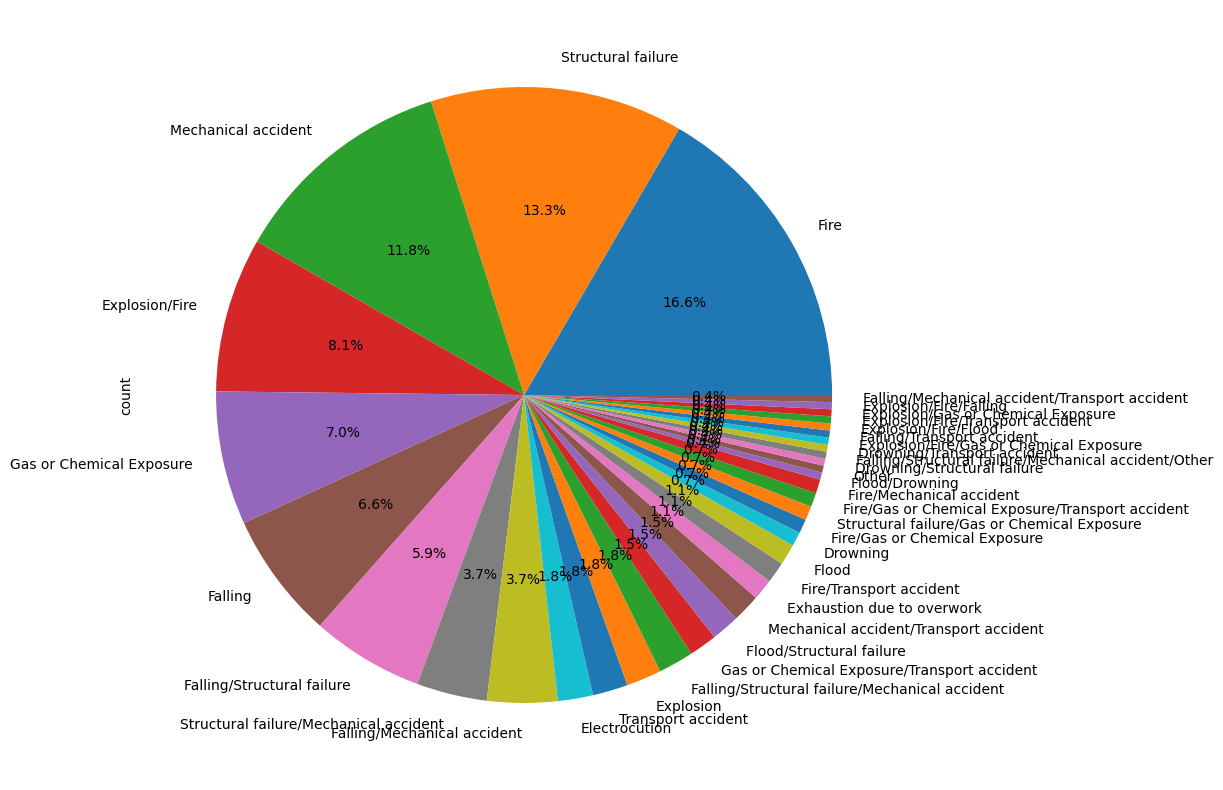

In [33]:
#Pie chart, where we observe the % of accidents that prevail

torta = accidentes['Type'].value_counts()
plt.figure(figsize=(10, 10))
torta.plot.pie(autopct='%1.1f%%')
plt.rcParams['font.size'] = 8
plt.show()

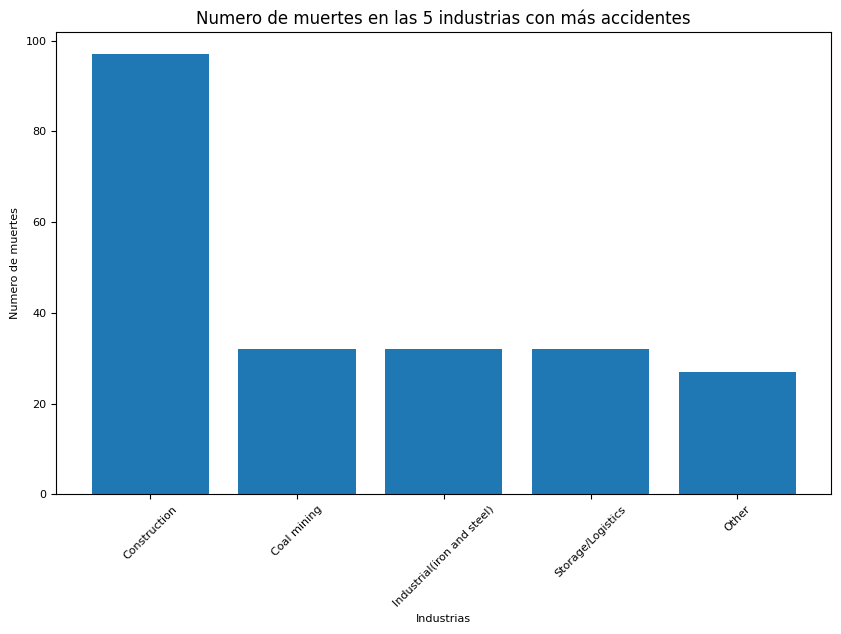

In [29]:
#graph of deaths by each industry

#filter industries with more accidents
industrias_mas_muertes = accidentes['Industry'].value_counts().head(5)

#number of deaths associated with each industry
numero_muertes_industria = accidentes.groupby('Industry')['Number of Deaths'].sum()

#filter the number of fatalities only for industries with fewer accidents
numero_muertes_industria = numero_muertes_industria.loc[industrias_mas_muertes.index]

#create graphics
plt.figure(figsize =(10, 6))
plt.bar(industrias_mas_muertes.index, industrias_mas_muertes)
plt.rcParams['font.size'] = 10

#tags and title
plt.xlabel('Industrias')
plt.ylabel('Numero de muertes')
plt.title('Numero de muertes en las 5 industrias con más accidentes')

#rotate the labels
plt.xticks(rotation=45)

plt.show()

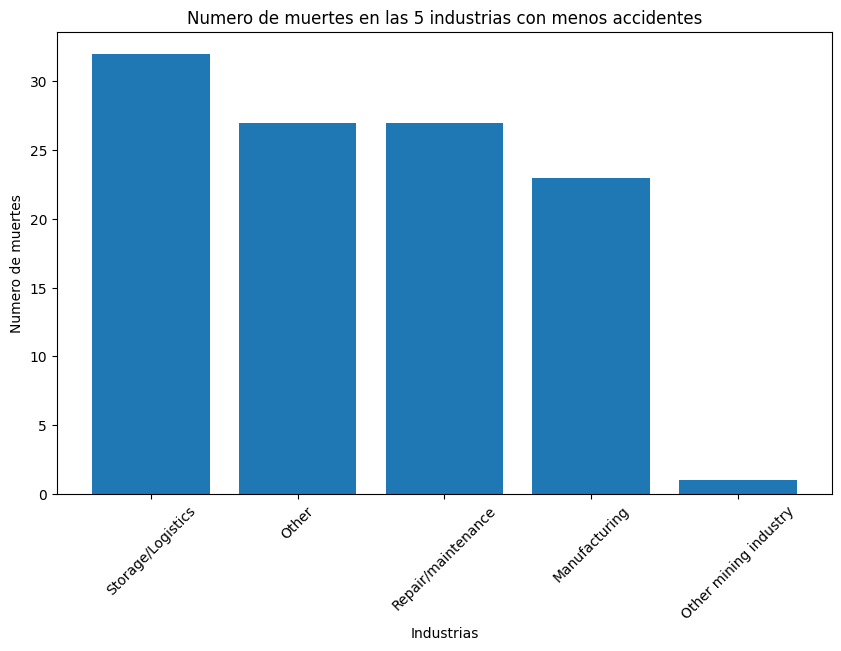

In [30]:
#graphic of fatalities for each industry

#filter industries with fewer accidents
industrias_menos_muertes = accidentes['Industry'].value_counts().tail(5)

#number of deaths associated with each industry
numero_muertes_industria = accidentes.groupby('Industry')['Number of Deaths'].sum()

#we filter the number of fatalities only for industries with fewer accidents
numero_muertes_industria = numero_muertes_industria.loc[industrias_menos_muertes.index]

#create graphics
plt.figure(figsize =(10, 6))
plt.bar(industrias_menos_muertes.index, industrias_menos_muertes)
plt.rcParams['font.size'] = 10

#tags and title
plt.xlabel('Industrias')
plt.ylabel('Numero de muertes')
plt.title('Numero de muertes en las 5 industrias con menos accidentes')

#rotate the labels
plt.xticks(rotation=45)

plt.show()

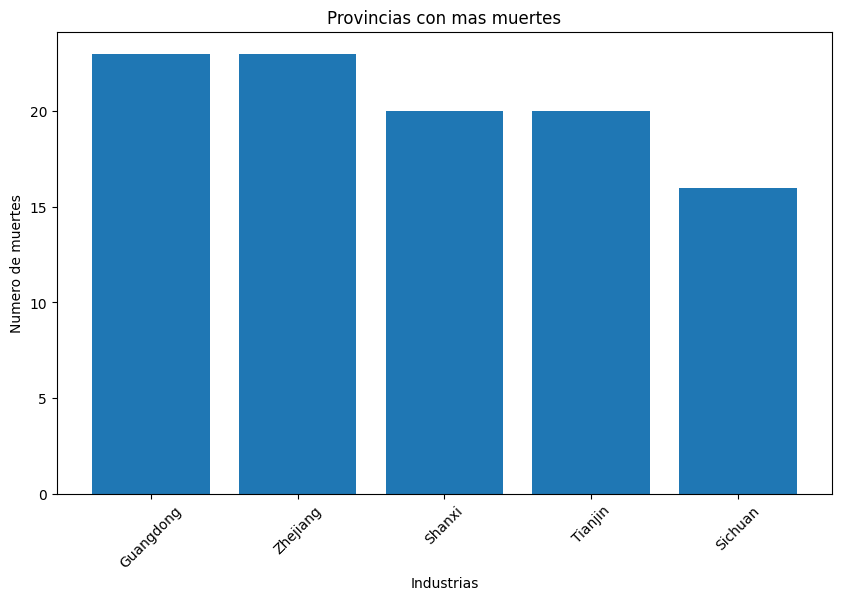

In [31]:
# graphic of deaths for each province

#we filter province with more deaths
provincias_mas_muertes = accidentes['Province'].value_counts().head(5)

# number of deaths associated with each province
numero_muertes_provincia = accidentes.groupby('Province')['Number of Deaths'].sum()

#we filter the number of deaths only for provinces with fewer deaths.
numero_muertes_provincia = numero_muertes_provincia.loc[provincias_mas_muertes.index]

#create graphics
plt.figure(figsize =(10, 6))
plt.bar(provincias_mas_muertes.index, provincias_mas_muertes)
plt.rcParams['font.size'] = 10

#tags and title
plt.xlabel('Industrias')
plt.ylabel('Numero de muertes')
plt.title('Provincias con mas muertes')

#rotate the labels
plt.xticks(rotation=45)

plt.show()

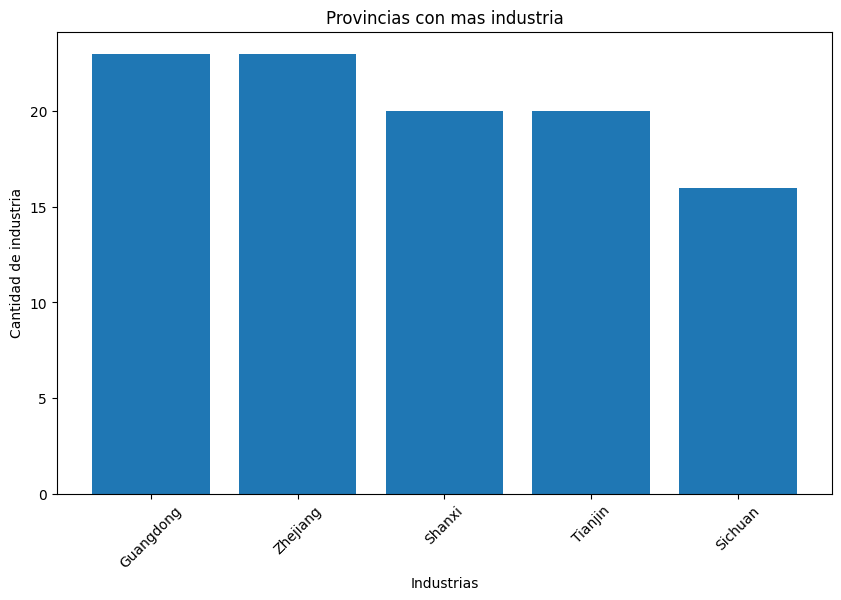

In [32]:
#province graph and number of industries

#filter province with more industries
provincias_mas_muertes = accidentes['Province'].value_counts().head(5)

#number of industries associated with each province
numero_muertes_provincia = accidentes.groupby('Province')['Industry'].sum()

#we filter the number of industries only for provinces
numero_muertes_provincia = numero_muertes_provincia.loc[provincias_mas_muertes.index]

#create graphic
plt.figure(figsize =(10, 6))
plt.bar(provincias_mas_muertes.index, provincias_mas_muertes)
plt.rcParams['font.size'] = 10

#tags and title
plt.xlabel('Industrias')
plt.ylabel('Cantidad de industria')
plt.title('Provincias con mas industria')

#rotate the labels
plt.xticks(rotation=45)

plt.show()

IN CONCLUSION, AFTER ANALYZING THE GRAPHS, IT CAN BE OBSERVED THAT THE INDUSTRY WITH THE HIGHEST RATE OF ACCIDENTS AND FATALITIES IS CONSTRUCTION, AS WELL AS WITHIN THE PIE CHART. THE GRAPH ALSO SHOWS THAT THE INDUSTRY WITH THE HIGHEST RATE OF ACCIDENTS AND FATALITIES IS THE CONSTRUCTION INDUSTRY, AS WELL AS WITHIN THE PIE CHART, THE ONE THAT REFERS TO ACCIDENTS IS DOMINATED BY 4 MAJOR TYPES OF ACCIDENTS. GUANGDONG AND ZHEJIANG CAN ALSO BE IDENTIFIED AS THE PROVINCES WITH THE HIGHEST NUMBER OF INDUSTRIES AND THEREFORE THE HIGHEST NUMBER OF ACCIDENTS AND FATALITIES ACCORDING TO THE OBSERVED AND ANALYZED CSV DATA.